#### Lecture 12 - ODEs: Second-order and Systems

##### Swinging Pendulum

$$ \frac{d^2\theta}{dt^2} + \frac{g}{l}sin\theta = 0$$

Solve for $\theta(t)$ and $\omega(t)$ for $t \in [0,4]$ seconds. The initial conditions are $\theta(0)=0.1$ radians and $\omega(0)=0$ radians per second. The length is $l=0.6$ meters. Use the built-in function `scipy.integrate.solve_ivp`.

In [81]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

g   = 9.81 # m/sec2
l = 0.6 # m
tmin = 0 # s
tmax = 4 # s

def dydt(t,y):
    return [y[1], (-g/l)*np.sin(y[0])]

sol = scipy.integrate.solve_ivp(dydt, 
                                t_span=[tmin, tmax], 
                                y0=[0.1, 0],
                                # t_eval=np.arange(tmin, tmax, 0.1),
                                rtol=1e-6)

print(sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 314
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.02440868, 0.10011249, 0.17742288, 0.25665658,
       0.33892424, 0.42570769, 0.51906875, 0.61908091, 0.70250504,
       0.78572072, 0.86392252, 0.94101093, 1.01982691, 1.10146289,
       1.18730806, 1.27935381, 1.37887424, 1.46371886, 1.54830994,
       1.62735067, 1.70425235, 1.7826732 , 1.86370378, 1.94865009,
       2.03939619, 2.13789882, 2.22436456, 2.31053061, 2.39051882,
       2.46727819, 2.54533213, 2.62578968, 2.70988487, 2.79937977,
       2.8965019 , 2.98477609, 3.07271268, 3.15375133, 3.23042071,
       3.30814512, 3.38807394, 3.47138222, 3.5597114 , 3.65529033,
       3.75487307, 3.84507938, 3.92662579, 4.        ])
 t_events: None
        y: array([[ 0.1       ,  0.09951415,  0.09193078,  0.07538719,  0.05087576,
         0.01998924, -0.01489576, -0.05028079, -0.08022167, -0

The solution object contains lots of information. We want to plot the state variables, so we can access `sol.t` and `sol.y`. Note `sol.t` is a 1-D vector and `sol.y` is a 2-D matrix because there are two state variables in this problem. 

We have two choices related to the step size. If we specify `rtol`, the method will choose a step size to ensure that the relative tolerance is met. The default value of `rtol` is `1e-3`, but a smaller value is needed for this problem. The second option is to specify `t_eval` which will return a solution at that vector of points with fixed step size `dt` (commented out above).

By default, this uses the `RK45` method, which is a variant of the RK4 method we wrote last class.

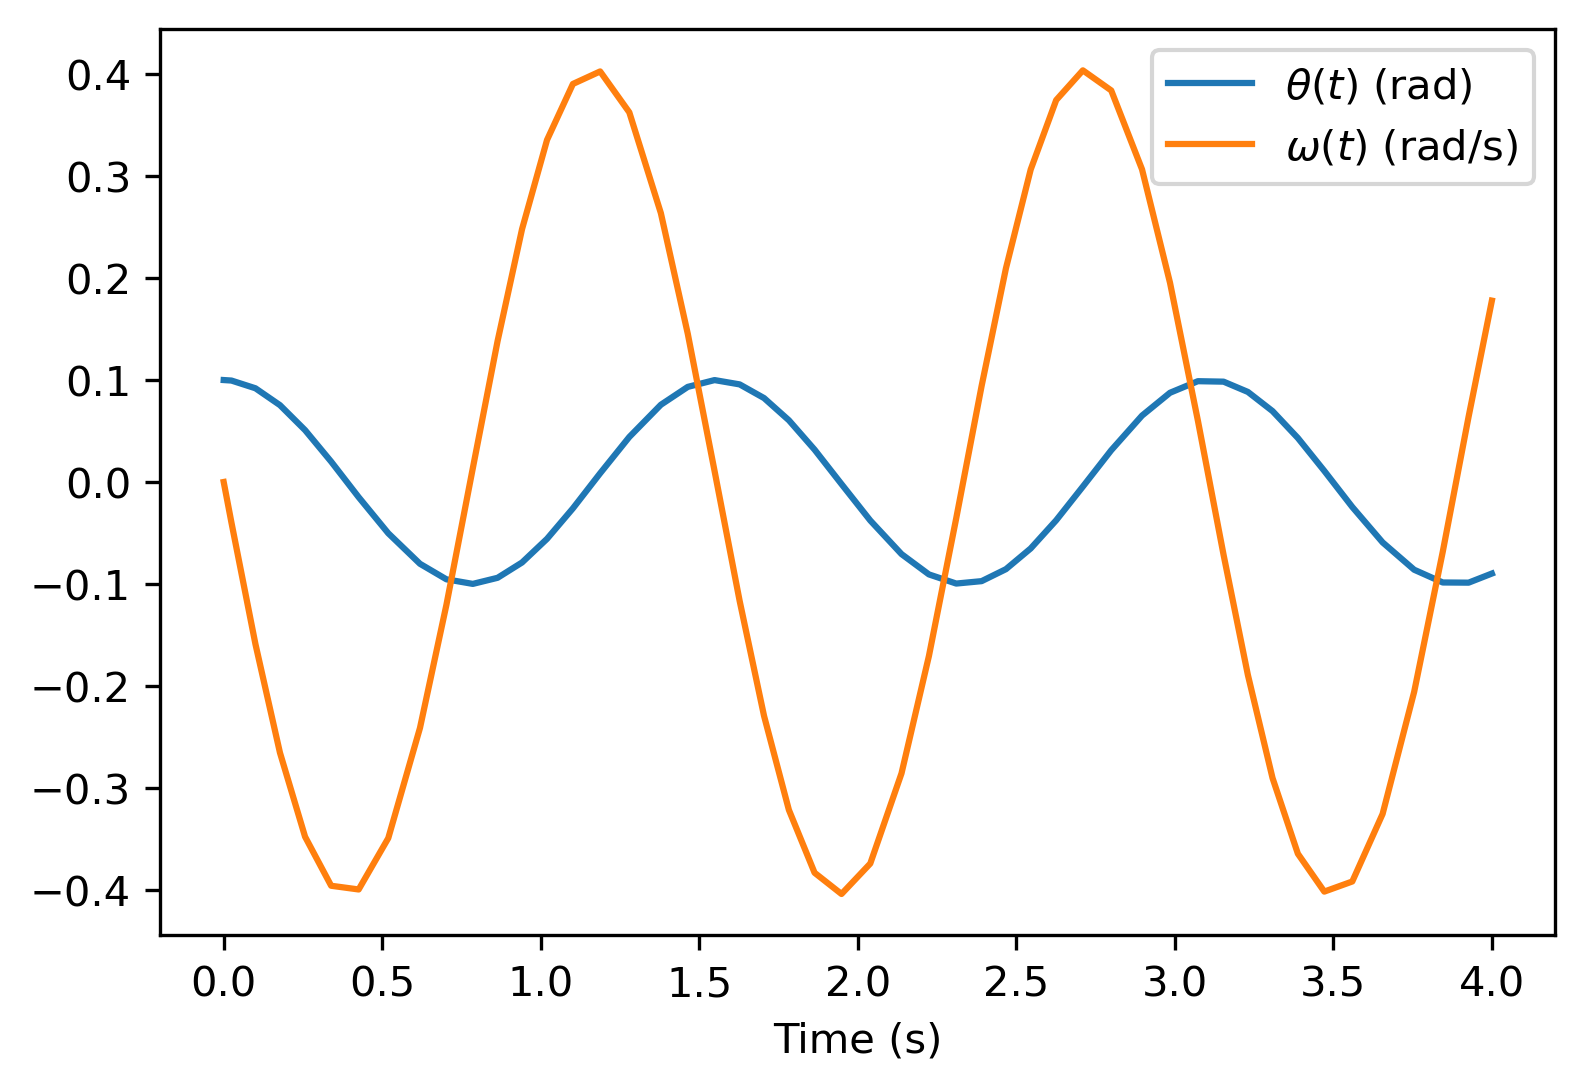

In [82]:
plt.plot(sol.t, sol.y[0,:], label=r'$\theta(t)$ (rad)')
plt.plot(sol.t, sol.y[1,:], label=r'$\omega(t)$ (rad/s)')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

##### Mass-spring-damper system (C&C 25.16)

$$ m \frac{d^2x}{dt^2} + c\frac{dx}{dt} + kx = 0$$

- $x$: displacement from equilibrium position (m)
- $t$:  time (s)
- $m$: mass = 20 kg
- $k$: spring constant = 20 N/m
- $c$: damping coefficient (N*s/m)
- Initial displacement $x(0)=1$ m 
- Initial velocity $v(0)=0$ m/s

The damping coefficient $c$ takes on three values of **5 (underdamped), 40 (critically damped), and 200 (overdamped)**. Recall the critically damped case occurs when $c = \sqrt{4km}$.

Solve this equation with `solve_ivp` for $t \in [0,15]$ s. Plot the displacement versus time for each of the three values of the damping coefficient on the same plot.

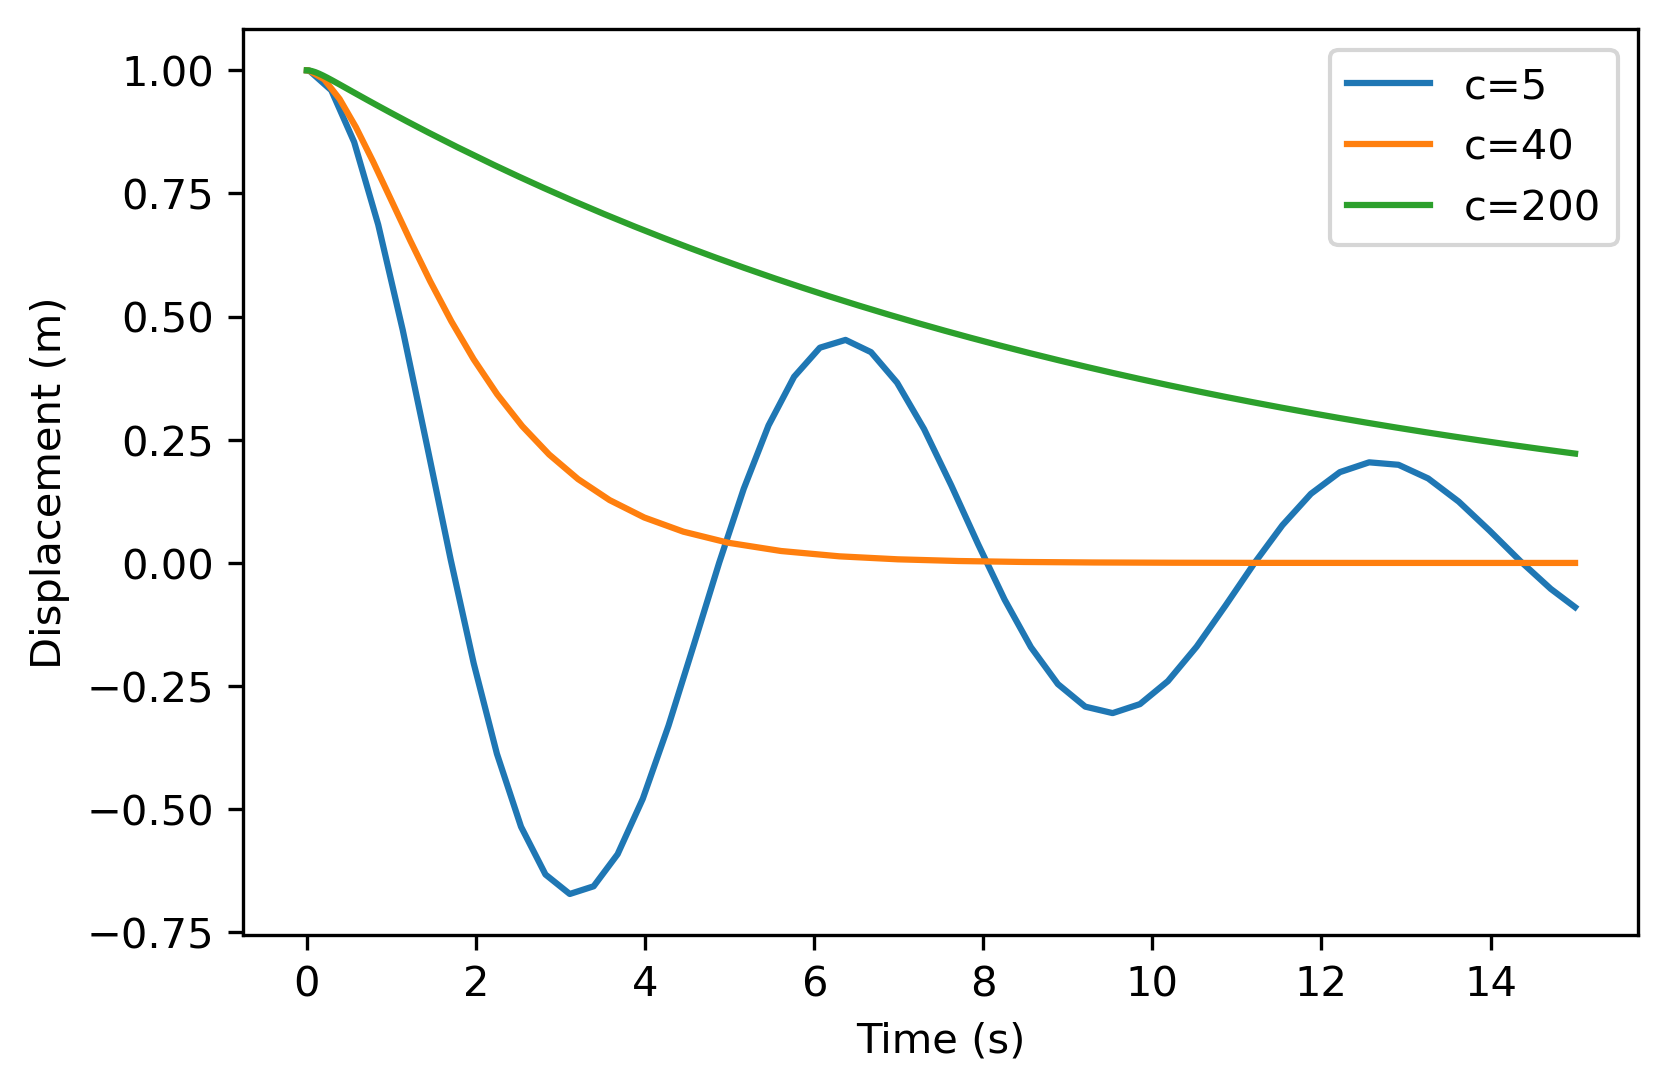

In [83]:
m = 20 # kg
k = 20 # N/m

def dydt(t,y):
    return [y[1], -(c/m)*y[1] - (k/m)*y[0]]

for c in [5, 40, 200]: # N*s/m
    sol = scipy.integrate.solve_ivp(dydt, 
                                    t_span=[0, 15], 
                                    y0=[1, 0],
                                    rtol=1e-6)
    plt.plot(sol.t, sol.y[0,:], label='c=%d' % c)

plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.legend()
plt.show()

Now for the underdamped case ($c=5$), add forced vibration with $F_0=1$ and $\omega=1$. What happens and why?

$$ m \frac{d^2x}{dt^2} + c\frac{dx}{dt} + kx = F_0 cos(\omega t)$$

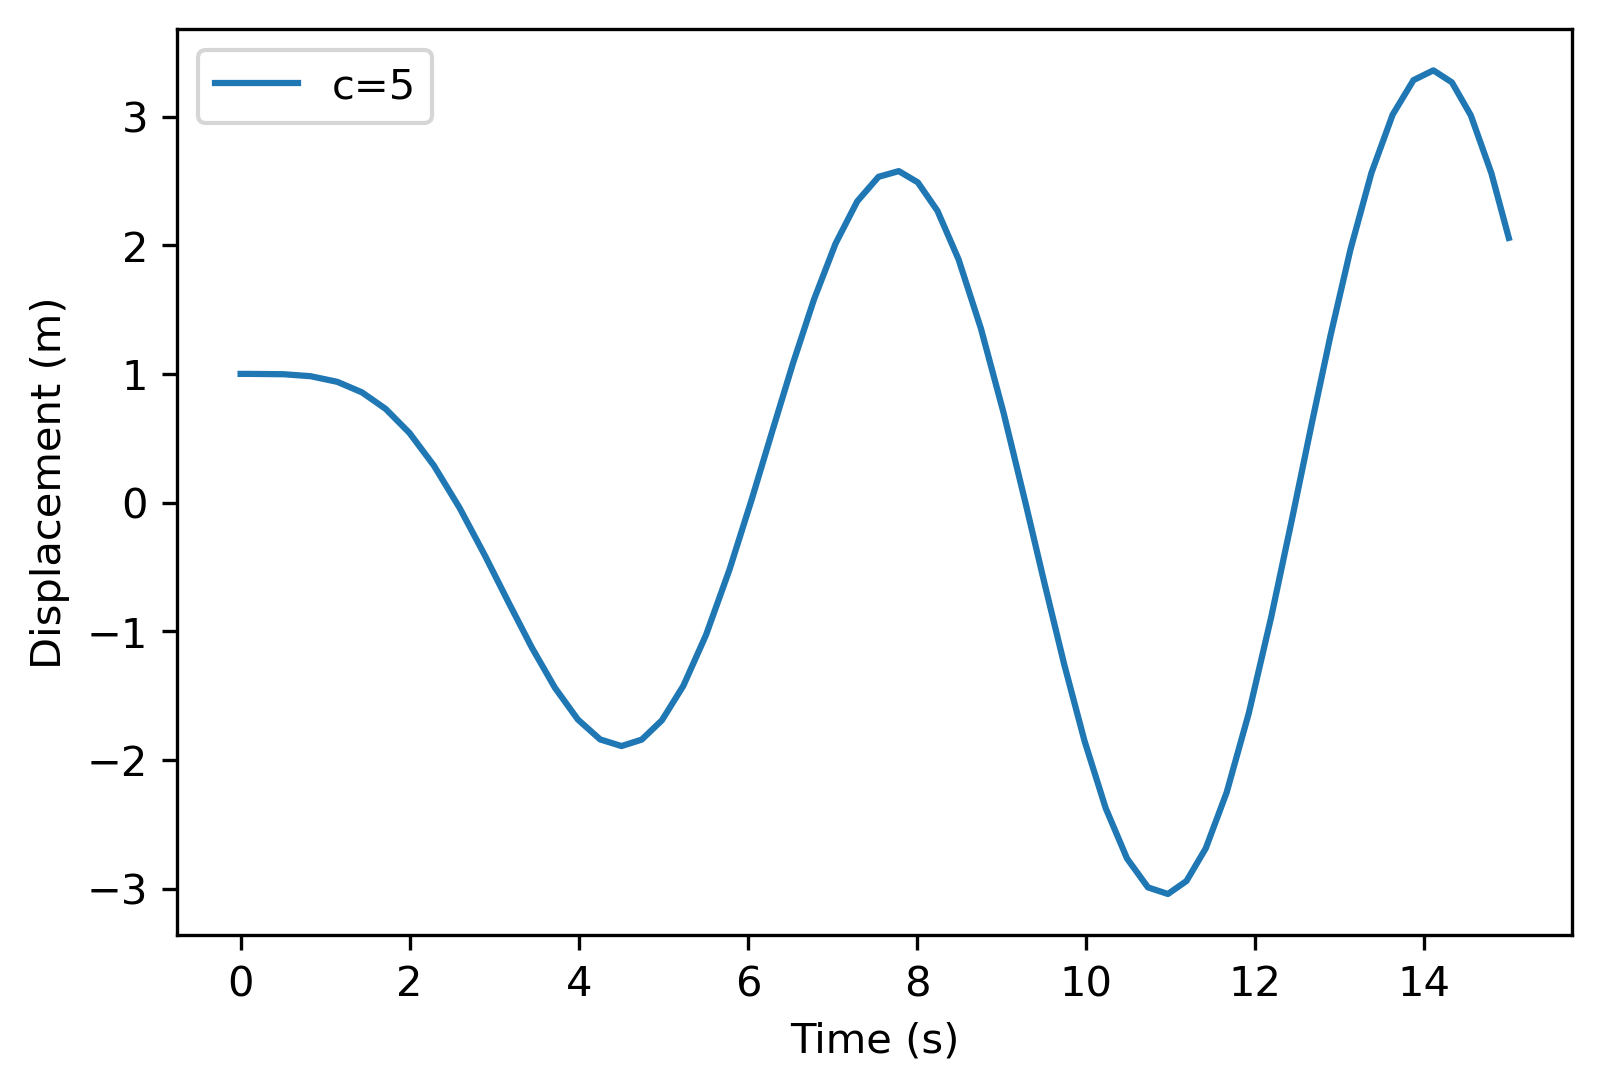

In [84]:
F0 = 1
w = 1
c = 5

def dydt(t,y):
    return [y[1], F0*np.cos(w*t) -(c/m)*y[1] - (k/m)*y[0]]

sol = scipy.integrate.solve_ivp(dydt, 
                                t_span=[0, 15], 
                                y0=[1, 0],
                                rtol=1e-6)
plt.plot(sol.t, sol.y[0,:], label='c=%d' % c)
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.legend()
plt.show()

The amplitude of the vibration is growing over time. This is an example of resonance. The frequency of the forced vibration $\omega$ is close to the natural frequency of the system, $\omega_d = \sqrt{\frac{k}{m}(1-\frac{c^2}{4mk})}$. In this case the amplitude does not grow unbounded. It will reach a maximum if we extend the simulation out further in time.

In [85]:
print('w_d = ', np.sqrt(k/m*(1-c**2/(4*m*k))))

w_d =  0.9921567416492215


##### Predator-prey systems (C&C Case Study 28.2)

Lotka-Volterra equations:

$$ \frac{dy_1}{dt} = ay_1 - by_1y_2$$

$$ \frac{dy_2}{dt} = -cy_2 + dy_1y_2$$

- $y_1$: prey population
- $y_2$: predator population
- $t$:  time (years), $t \in [0,30]$
- Constants $a=1.2$, $b=0.6$, $c=0.8$, $d=0.3$
- Initial conditions: $y(0) = [2,1]$


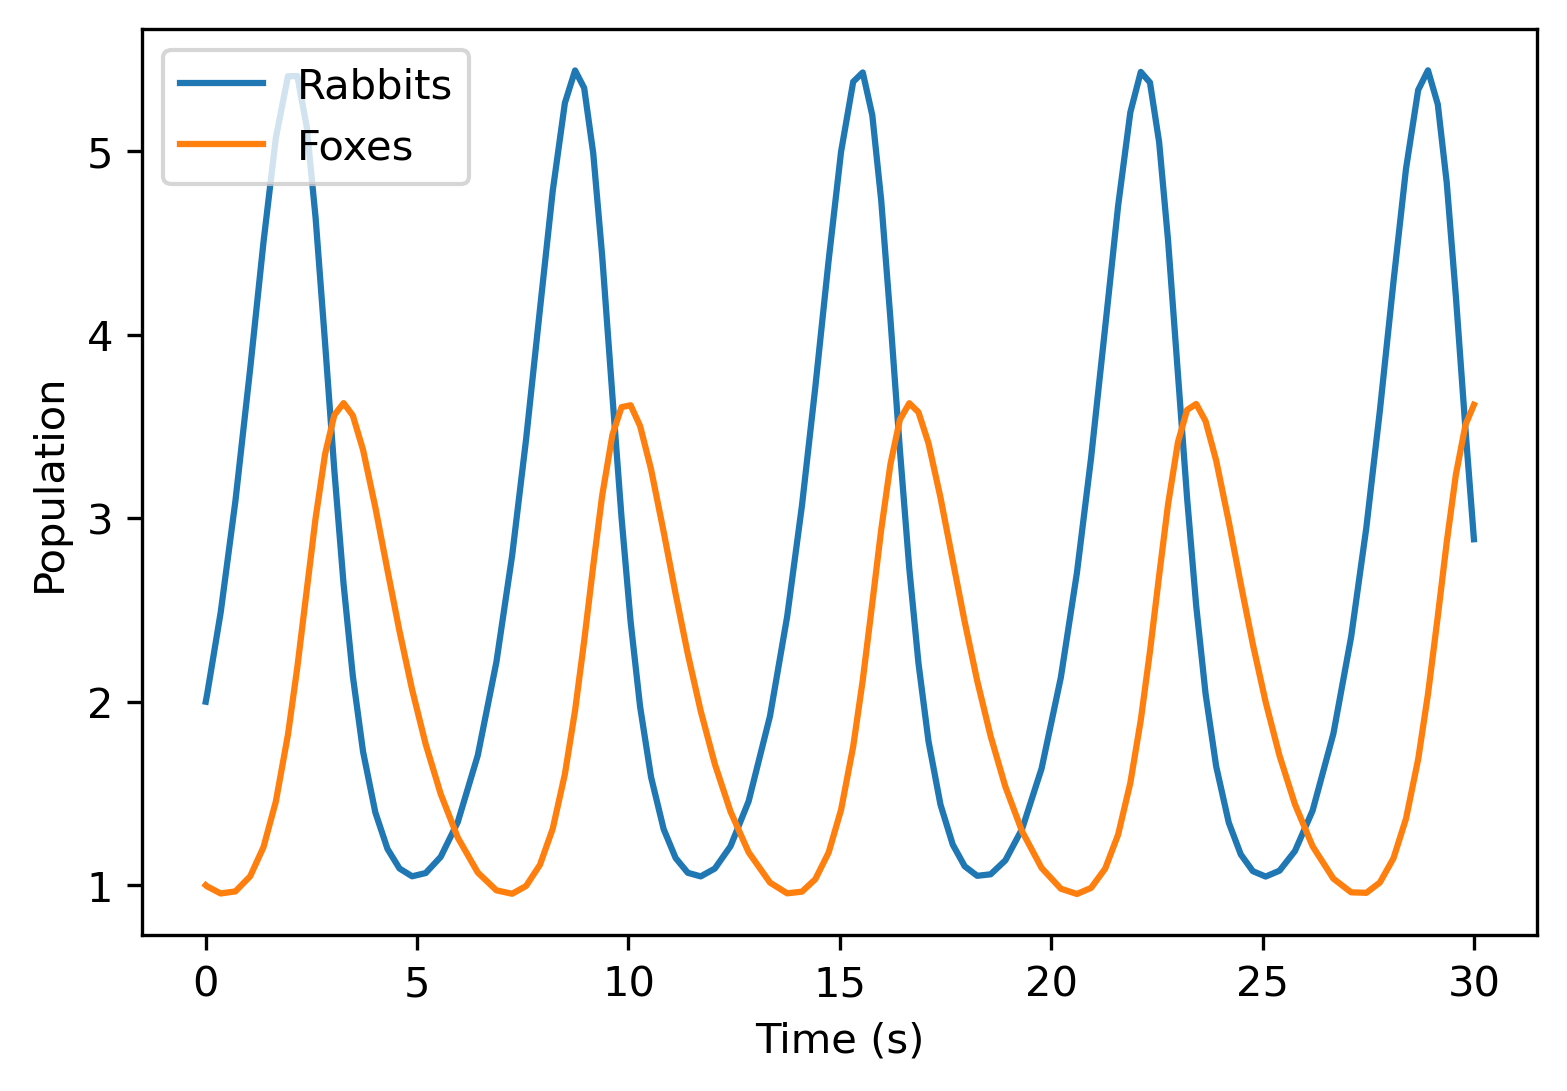

In [86]:
a = 1.2
b = 0.6
c = 0.8
d = 0.3

def dydt(t,y):
    return [a*y[0] - b*y[0]*y[1], -c*y[1] + d*y[0]*y[1]]

sol = scipy.integrate.solve_ivp(dydt, 
                                t_span=[0, 30], 
                                y0=[2, 1],
                                rtol=1e-6)

plt.plot(sol.t, sol.y[0,:], label='Rabbits')
plt.plot(sol.t, sol.y[1,:], label='Foxes')
plt.xlabel('Time (s)')
plt.ylabel('Population')
plt.legend()
plt.show()

Phase plot:

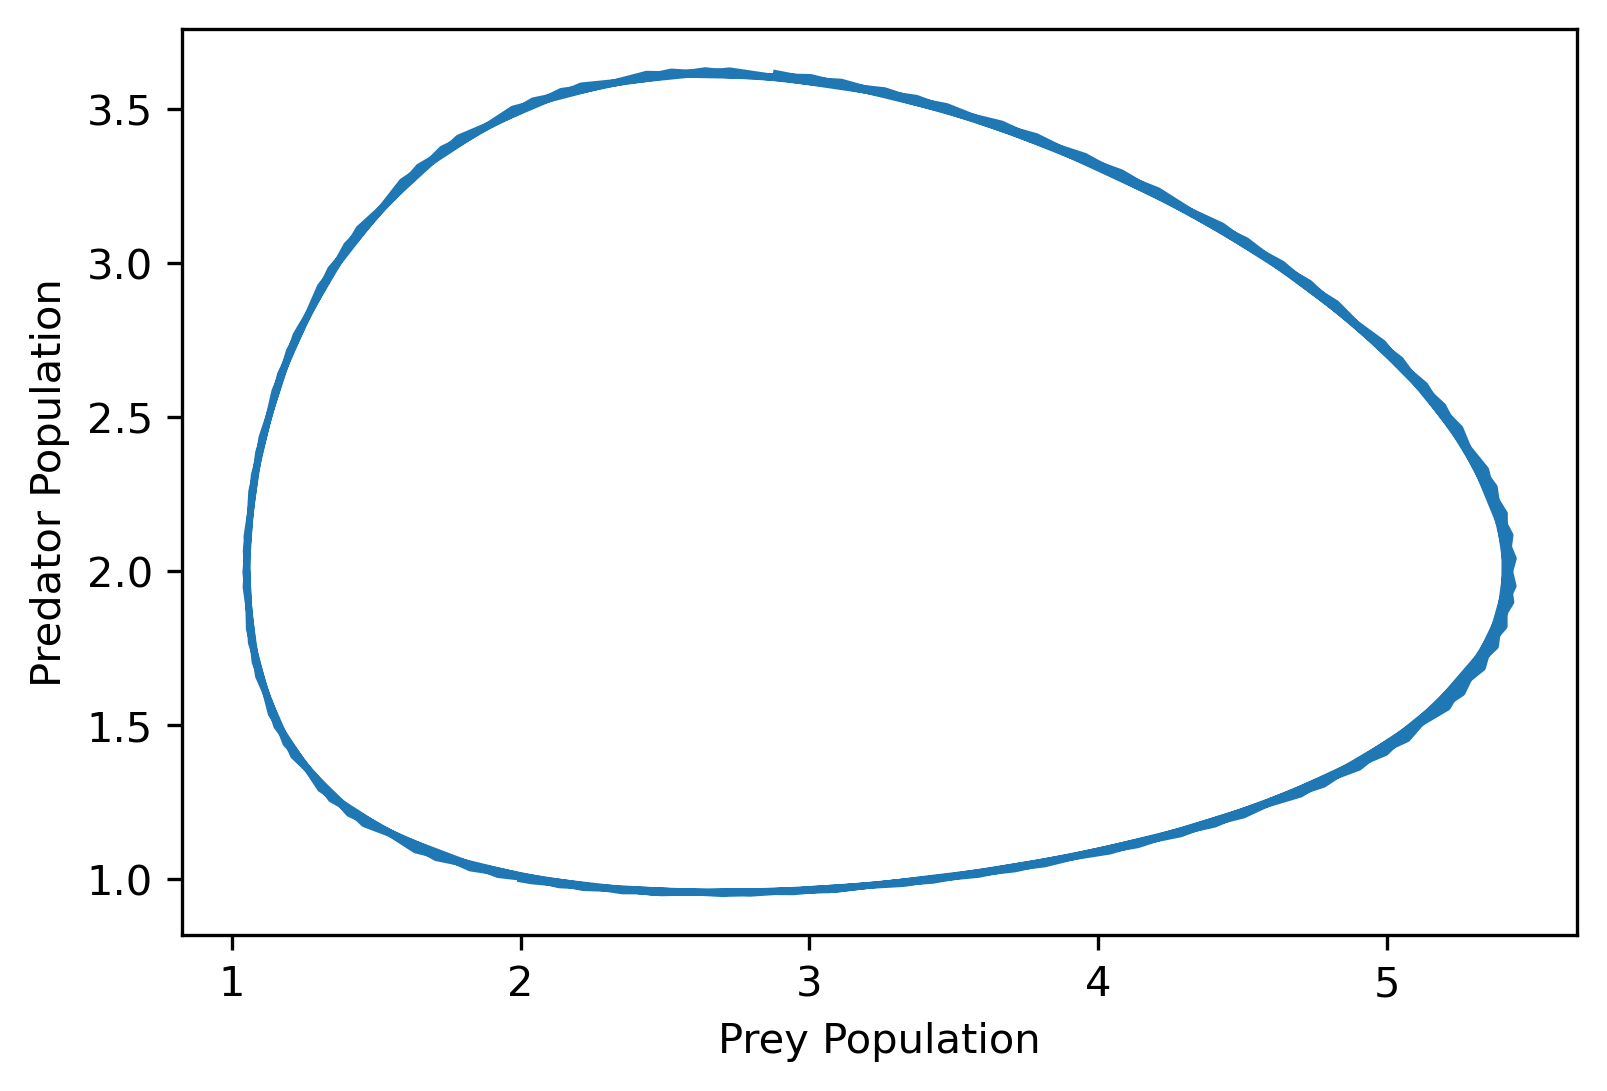

In [87]:
plt.plot(sol.y[0,:], sol.y[1,:])
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.show()

Additional questions:
- Add a carrying capacity $K$ for the prey population by modifying the exponential growth term to logistic growth: $\frac{dy_1}{dt} = ay_1(1-\frac{y_1}{K}) - by_1y_2$

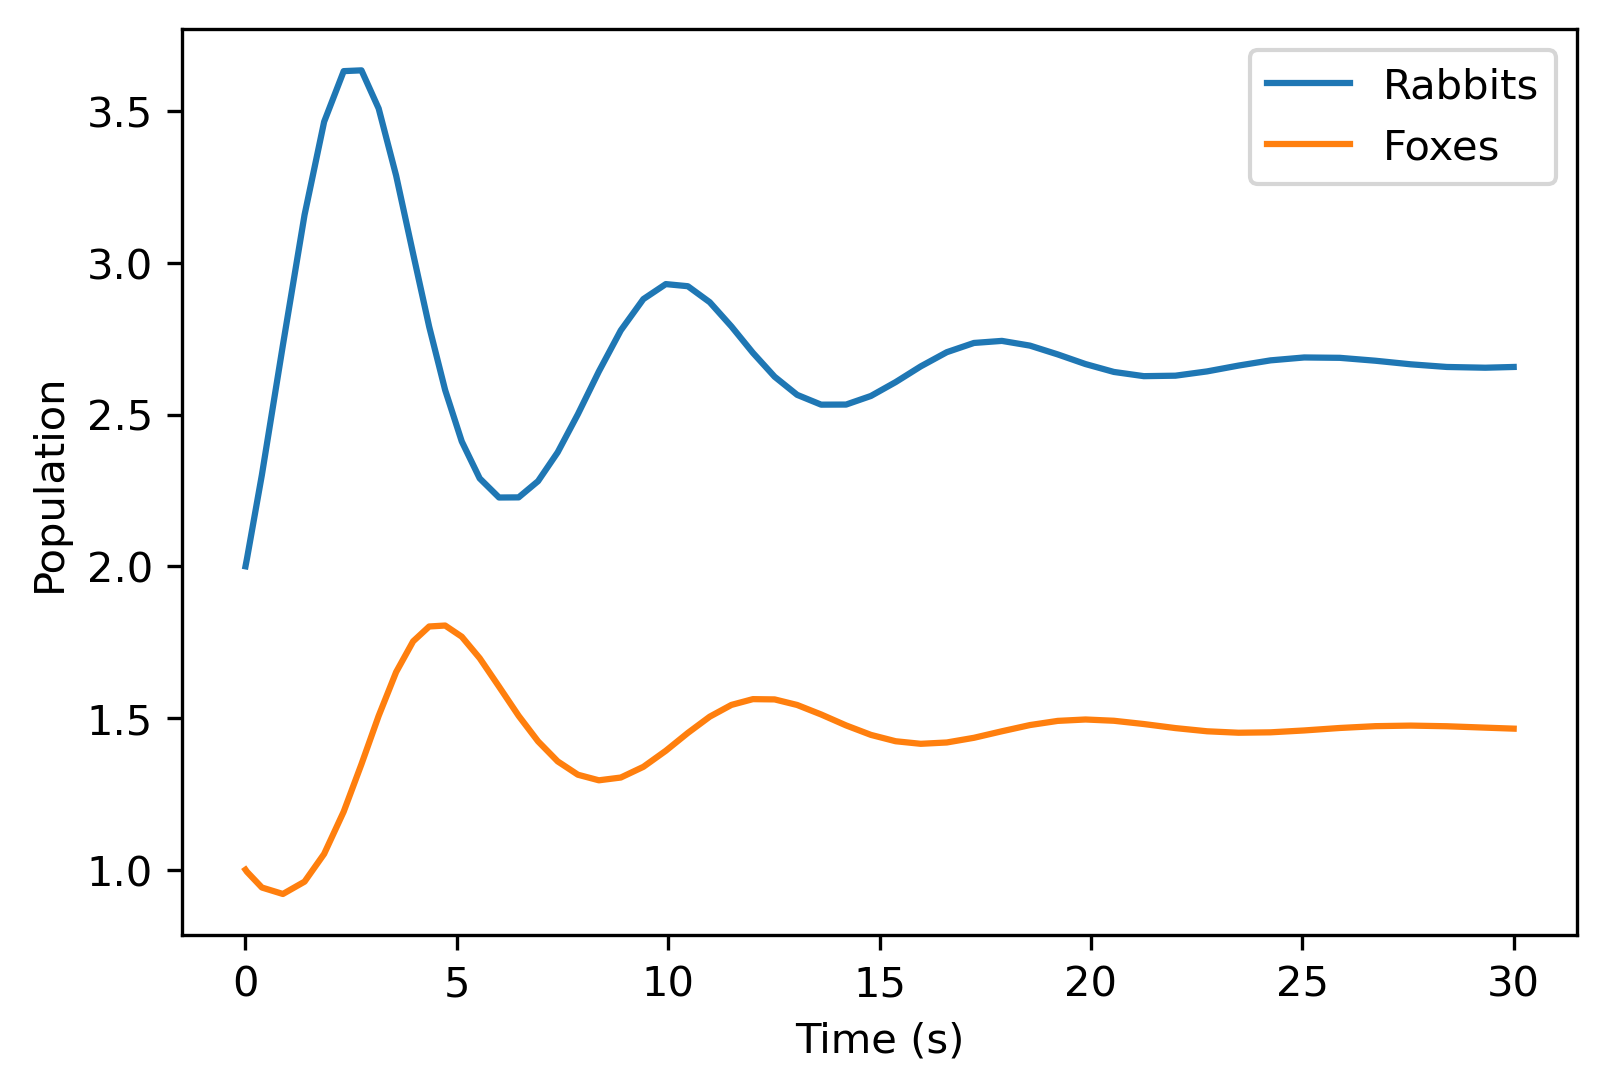

In [88]:
# first question - redefine derivative function
K = 10 # carrying capacity

def dydt_new(t,y):
    return [a*y[0]*(1-y[0]/K) - b*y[0]*y[1], -c*y[1] + d*y[0]*y[1]]

sol = scipy.integrate.solve_ivp(dydt_new, 
                                t_span=[0, 30], 
                                y0=[2, 1],
                                rtol=1e-6)

plt.plot(sol.t, sol.y[0,:], label='Rabbits')
plt.plot(sol.t, sol.y[1,:], label='Foxes')
plt.xlabel('Time (s)')
plt.ylabel('Population')
plt.legend()
plt.show()

With a carrying capacity defined by the logistic growth equation, the two populations reach a steady state after a transient oscillation.

##### Lorenz equations (C&C Case Study 28.2)

Nonlinear equations to describe atmospheric fluid motion due to temperature variations:

$$ \frac{dx}{dt} = -\sigma x + \sigma y$$

$$ \frac{dy}{dt} = rx - y - xz$$

$$ \frac{dz}{dt} = -bz + xy$$


- Constants $\sigma=10$, $b=2.666667$, $r=28$
- Initial conditions: $y(0) = [5,5,5]$
    + Run again with $y(0) = [5.01,5,5]$
- Solve from $t \in [0,20]$

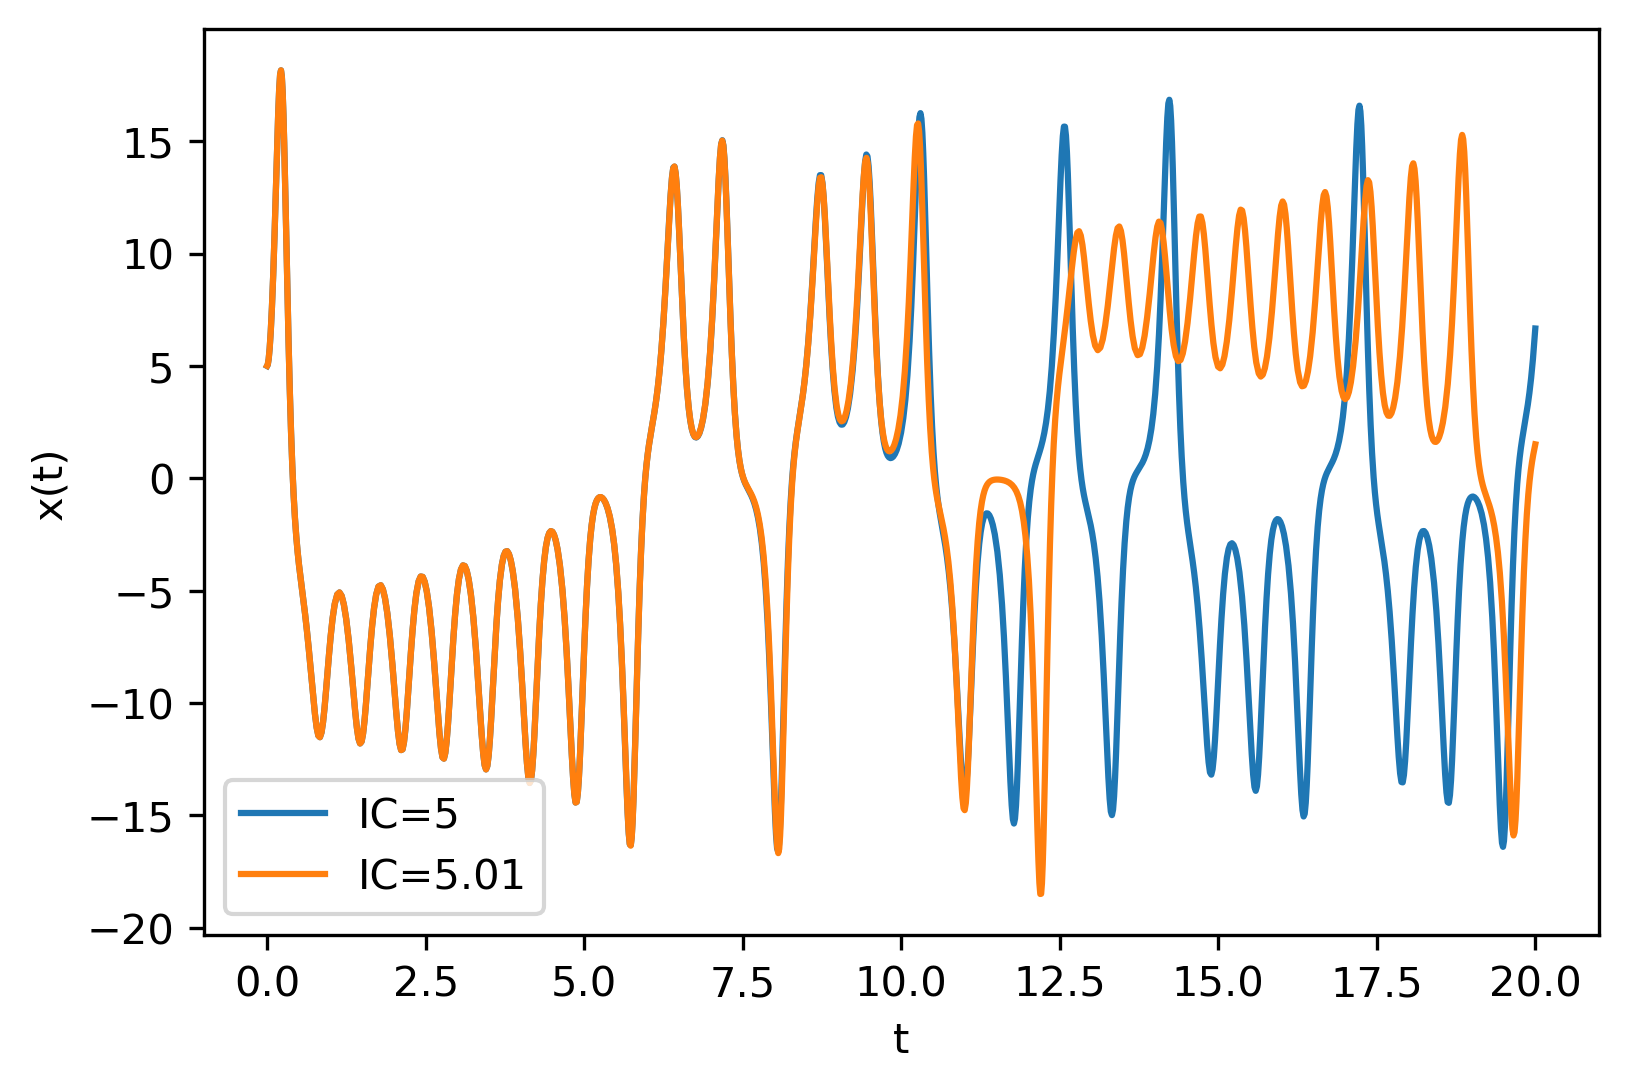

In [89]:
s = 10
b = 2.666667
r = 28

def dydt(t,y):
    return [-s*y[0] + s*y[1], r*y[0] - y[1] - y[0]*y[2], -b*y[2] + y[0]*y[1]]

sol = scipy.integrate.solve_ivp(dydt, 
                                t_span=[0, 20], 
                                y0=[5, 5, 5],
                                rtol=1e-6)

# run again with small change to IC
sol2 = scipy.integrate.solve_ivp(dydt, 
                                 t_span=[0, 20], 
                                 y0=[5.01, 5, 5],
                                 rtol=1e-6)

plt.plot(sol.t, sol.y[0,:], label='IC=5')
plt.plot(sol2.t, sol2.y[0,:], label='IC=5.01')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.show()

The system is deterministic, but chaotic because it is highly sensitive to the initial conditions. We can also look at the phase plot (in the x-y projection):

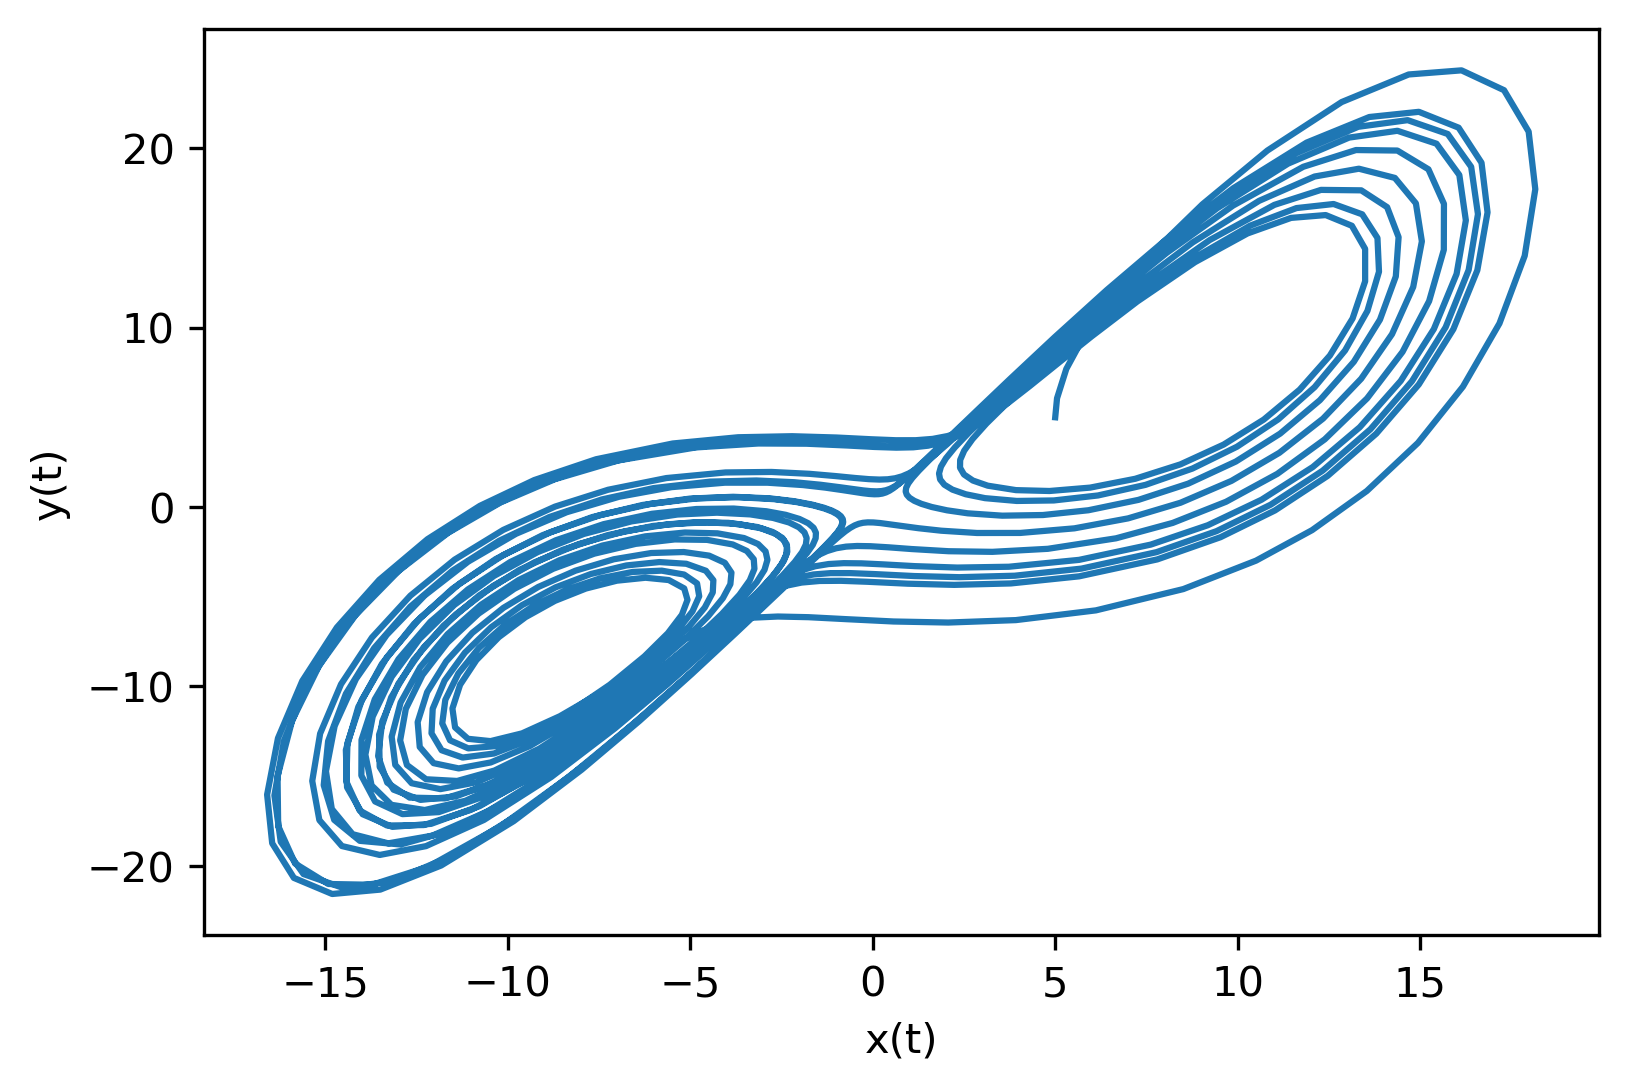

In [90]:
plt.plot(sol.y[0,:], sol.y[1,:])
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.show()